In [1]:
import matplotlib.pyplot as plt # import plotting package 
import pandas as pd
import numpy as np
# render plotting automatically 
%matplotlib inline 

import matplotlib as mpl # more plotting finctionality 

mpl.rcParams['figure.dpi'] = 400 # high resolution figures 

In [2]:
# import the data 
df_clean_2 = pd.read_csv('data/default_of_clients_cleaned')
df_clean_2.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# changes the text describing the chart
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221BEF07BA8>,
      dtype=object)

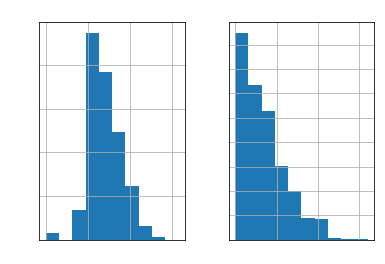

In [4]:
# age data and credit limit are graphed on a histogram  
# graph the data in a histogram 
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [5]:
# showing stats(frequencies) for age and credit card limit
# most people are around the age 25-30 
# most people have a credit card limit that is lower  
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26979.000000,26979.000000
mean,165958.474369,35.090663
std,130333.534550,9.934731
min,0.000000,0.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Data Dictionary for value_counts in EDUCATION 
1 - graduate school
2 - university
3 - highschool
4,5,6 - others

In [6]:
# need to look at the categorical featurers use value_counts
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
0      326
5      245
4      115
6       43
Name: EDUCATION, dtype: int64

In [7]:
# show value_counts of MARRIAGE
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
0      363
3      286
Name: MARRIAGE, dtype: int64

In [8]:
# changes the values of 0 in MARRIAGE feature to 3 
# 1 married, 2 single, 3 other
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      649
Name: MARRIAGE, dtype: int64

In [9]:
# ML algorithms only work with numbers 
# categorical features need to be mapped to numbers 1, 2, 3, 4
# this assignment of categories is called ordinal features
# df_clean_2['AGE'].hist()

Text(0.5, 0, 'Education Level: ordinal encoding')

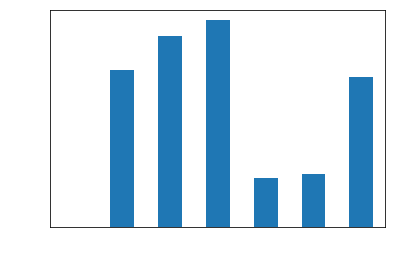

In [10]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education Level: ordinal encoding')

Process: Graph specific parts(features) of the data using bar charts or histograms
If the data is graphed in a linear straight line relationship between features and response, then linear regression would be best
Or any type of simple predicting algorithm like logistic regression

Looking above: straight-line fit would not describe the data that well
Since the feature graphed is not linear, it would be better to graph the algorithm using a decision tree or random forest 

This all has to do with turning categorical data for features into ordinal data so it can be processed in a machine learnig algorithm

In [11]:
# Avoid Ordinal Encoding using One-Hot-Encoding
# Reverse engineer EDUCATION feature- obtain text labels that show the different education levels 
# Use pandas to create and OHE 

In [12]:
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [17]:
cat_mapping ={
    1 : "graduate school",
    2 : "university",
    3 : "highschool",
    4 : "others"
}

In [18]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,highschool
9,3,highschool


In [21]:
# Creates a one-hot Encoded  DataFrame of the EDUCATION_CAT column
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,highschool,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [24]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
            'highschool', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,highschool,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,highschool,0,1,0,0
9,highschool,0,1,0,0


Exploring Financial History in the Dataset

In [26]:
df = pd.read_csv('data/default_of_clients_cleaned')
df.head(10)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,5,ceae2946-47e4,50000,1,1,2,37,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,...,221,-159,567,380,601,0,581,1687,1542,0
8,8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
